In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# cargamos los datasets

# gases de efecto invernadero
emisiones=pd.read_csv('Datasets/Emisiones de gases de efecto invernadero totales/efecto_invernadero.csv')

# área selvática
area_selvatica=pd.read_csv('Datasets/╡rea selvática/area_selvatica.csv')

# crecimiento poblacional 
crecimiento_poblacional=pd.read_csv('Datasets/Crecimiento de la población Urbana/crecimiento_poblacional.csv')

In [4]:
emisiones

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFE,838050,948360,1342560,1381860,1406900,1436410,1436770,1457530,1471620,1478910,..,..
1,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,NaN,AFW,398170,553740,723970,740720,771100,790820,805370,835230,848650,881570,..,..
2,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,El mundo árabe,ARB,985720,1380740,2174340,2285760,2318020,2395260,2438650,2479110,2518170,2538650,..,..
3,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Estados pequeos del Caribe,CSS,44920,44910,56360,58520,57700,57020,56680,53830,53410,55020,..,..
4,Emisiones de gases de efecto invernadero total...,EN.ATM.GHGT.KT.CE,Europa Central y del Báltico,CEB,1280490,916490,902300,873260,845980,825390,837450,847240,870180,864510,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from Database: Indicadores del desarrollo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# De acuerdo con la previsualización del dataframe, los años 2019 y 2020 no tienen datos. Comprobemos qué datos únicos tienen:

emisiones.iloc[:266][['2019 [YR2019]', '2020 [YR2020]']].value_counts()

2019 [YR2019]  2020 [YR2020]
..             ..               266
dtype: int64

In [6]:
# Efectivamente, no hay datos para 2019 y 2020, por lo que omitimos estas columnas para nuestro análisis

# Las primeras 2 columnas solo indican el nombre y código de la serie (el cual siempre es el mismo), por lo tanto lo omitimos para facilitar la visualización.
valid_columns = emisiones.keys()[2:-2]

emisiones = emisiones.iloc[:266][valid_columns]

In [12]:
# Es de esperarse que no haya datos para todos los años de cada país.
# Eliminaremos los paises que no tengan datos para más de 2 años.

# Pero antes reemplacemos los valores faltantes representados por '..' por NaN.
emisiones = emisiones.replace('..', np.nan)

# Tomamos solo las columnas con datos numéricos para verificar los Nan
values_columns = emisiones.keys()[2:]

emisiones = emisiones[emisiones[values_columns].isnull().sum(axis=1) < 3]

for col in emisiones.columns[2:]:
    emisiones[col] = emisiones[col].astype('float64')

# Reemplazamos los valores faltantes por la media de los datos de ese año
emisiones[values_columns] = emisiones[values_columns].fillna(emisiones[values_columns].mean())

emisiones

,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,NaN,AFE,838050.0,948360.0,1342560.0,1381860.0,1406900.0,1436410.0,1436770.0,1457530.0,1471620.0,1478910.0
1,NaN,AFW,398170.0,553740.0,723970.0,740720.0,771100.0,790820.0,805370.0,835230.0,848650.0,881570.0
2,El mundo árabe,ARB,985720.0,1380740.0,2174340.0,2285760.0,2318020.0,2395260.0,2438650.0,2479110.0,2518170.0,2538650.0
3,Estados pequeos del Caribe,CSS,44920.0,44910.0,56360.0,58520.0,57700.0,57020.0,56680.0,53830.0,53410.0,55020.0
4,Europa Central y del Báltico,CEB,1280490.0,916490.0,902300.0,873260.0,845980.0,825390.0,837450.0,847240.0,870180.0,864510.0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,Venezuela,VEN,179990.0,228000.0,259660.0,279300.0,284140.0,285460.0,270980.0,257600.0,243570.0,233920.0
260,Viet Nam,VNM,72550.0,134560.0,257880.0,258290.0,268770.0,283000.0,327320.0,341580.0,340420.0,376530.0
263,"Yemen, Rep. del",YEM,12370.0,22250.0,32390.0,31470.0,38350.0,38810.0,26050.0,22740.0,21970.0,21760.0
264,Zambia,ZMB,45340.0,25680.0,32210.0,36130.0,37220.0,37680.0,38840.0,39100.0,39670.0,40670.0


In [31]:
emisiones.sort_values('1990 [YR1990]')

,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
250,Tuvalu,TUV,20.0,20.0,20.0,20.0,20.0,20.0,20.0,30.0,30.0,30.0
151,Kiribati,KIR,40.0,50.0,80.0,80.0,90.0,90.0,90.0,100.0,100.0,110.0
214,Santo Tomé y Príncipe,STP,90.0,100.0,150.0,170.0,170.0,170.0,170.0,180.0,190.0,190.0
186,Nauru,NRU,130.0,90.0,50.0,50.0,50.0,60.0,60.0,70.0,70.0,80.0
233,San Vicente y las Granadinas,VCT,160.0,240.0,310.0,480.0,300.0,370.0,300.0,350.0,350.0,370.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17,Sólo BIRF,IBD,14447470.0,15598650.0,25612840.0,26265630.0,26829890.0,27090890.0,27068200.0,27222310.0,27745020.0,28366540.0
33,Ingreso mediano,MIC,14843350.0,16190910.0,26492230.0,27157120.0,27773550.0,28098720.0,28130250.0,28356260.0,28938630.0,29631920.0
27,Ingreso mediano y bajo,LMY,15507940.0,16936130.0,27474750.0,28164440.0,28784830.0,29139510.0,29181020.0,29444030.0,30032290.0,30740280.0
18,BIRF y la AIF,IBT,16037780.0,17549070.0,28208270.0,28909410.0,29542690.0,29874230.0,29916640.0,30173010.0,30772000.0,31474040.0


Realizando una exploración de los datos básica se concluye que se ha de realizar una limpieza. De la fila 266 en adelante se tiene filas completamente vacías, las cuales se proceden a eliminar. También se eliminan las filas correspondientes a los años 2019 y 2020 pues estaban vacías. Se descartan las columnas 'Series name' y 'Series code' ya que no aportan información relevante.

<AxesSubplot:>

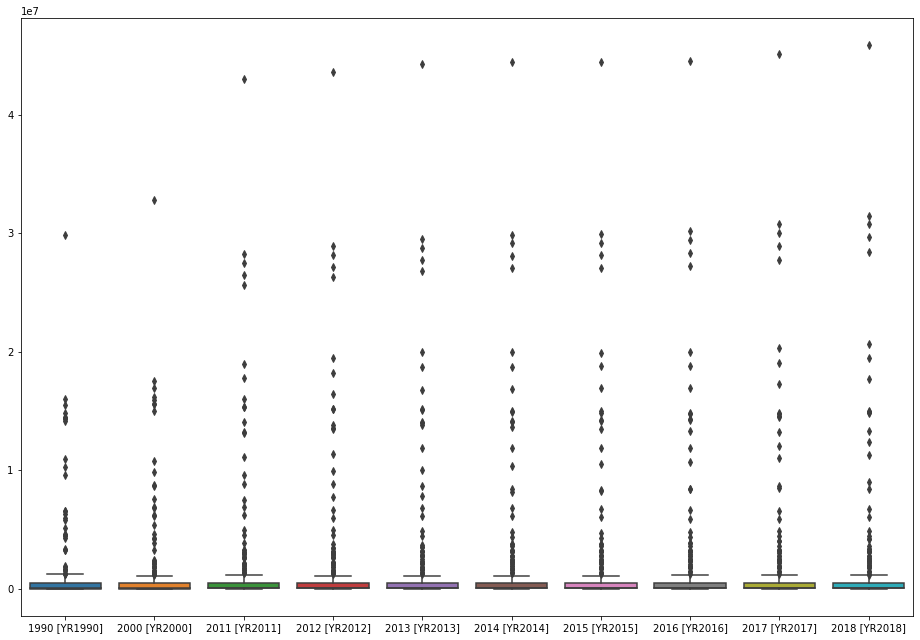

In [24]:
import seaborn as sns

plt.figure(figsize=(16,11))
sns.boxplot(data=emisiones)

In [ ]:
#emisiones[emisiones['Country Name']=='Colombia']

In [74]:
emisiones['Country Name']=='Colombia'

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Name: Country Name, Length: 266, dtype: bool

In [123]:
emisiones.mean()

/tmp/ipykernel_168093/3932285694.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  emisiones.mean()


1990 [YR1990]    1.157076e+06
2000 [YR2000]    1.243109e+06
2011 [YR2011]    1.726761e+06
2012 [YR2012]    1.755387e+06
2013 [YR2013]    1.784891e+06
2014 [YR2014]    1.796221e+06
2015 [YR2015]    1.797797e+06
2016 [YR2016]    1.807557e+06
2017 [YR2017]    1.834869e+06
2018 [YR2018]    1.868477e+06
dtype: float64

In [114]:
type(emisiones[values_columns].iloc[1][1])

str